In [2]:
import matplotlib.pyplot as plt
import matplotlib as matplt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import math
import statistics
import tables

np.set_printoptions(precision=3, suppress=True)

from matplotlib.gridspec import GridSpec


In [3]:
steal_policy = ['Ring', 'Random', 'LastVictim']

In [4]:
gflops = [9365.036293, 8625.938326, 6434.890758]
steal_req_send  = [1679, 28269, 5354]
successful_steals = [407, 307, 399, ]
successful_full_steals = [354, 190, 272]
perc_succesfull_steals = [24.240619, 1.085995, 7.452372]
perc_succesfull_full_steals = [21.083979, 0.672114, 5.080314]
task_received = [3727, 2252, 3145]


Text(0.5, 0, 'Steal Policy')

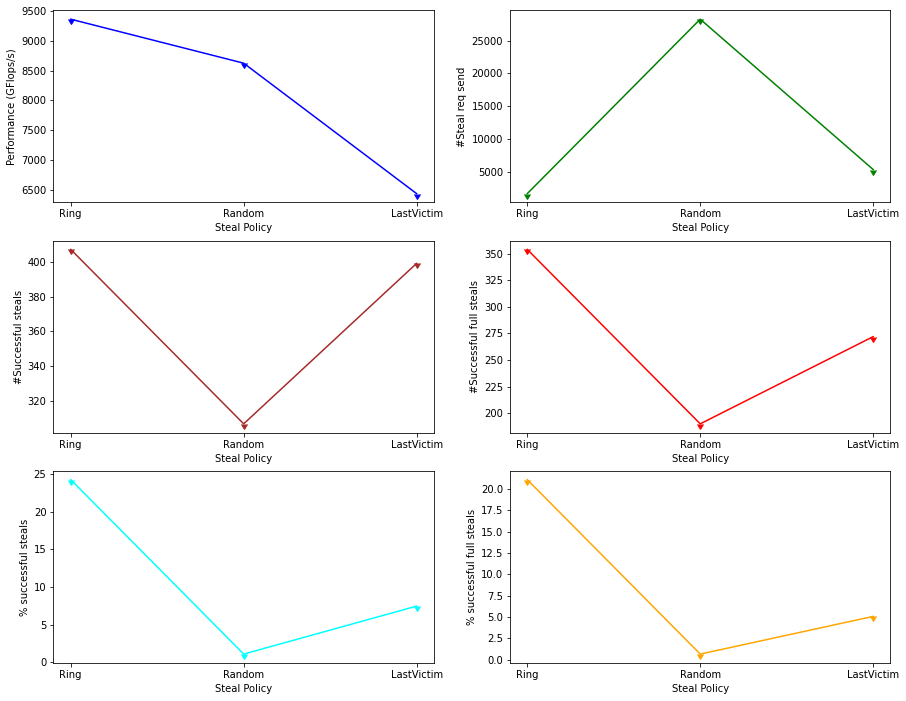

In [5]:

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(nrows=3, ncols=2)



ax0 = fig.add_subplot(gs[0, 0])

plt.plot(steal_policy, gflops, color="blue", marker=11)

ax0.set_xlabel('Steal Policy')
ax0.set_ylabel('Performance (GFlops/s)')
#plt.legend()

ax1 = fig.add_subplot(gs[0,1])

plt.plot(steal_policy, steal_req_send, color="green", marker=11)


ax1.set_ylabel('#Steal req send')
ax1.set_xlabel('Steal Policy')
#plt.legend()

ax2 = fig.add_subplot(gs[1,0])

plt.plot(steal_policy, successful_steals, color="brown", marker=11)


ax2.set_ylabel('#Successful steals')
ax2.set_xlabel('Steal Policy')
#plt.legend()

ax3 = fig.add_subplot(gs[1,1])

plt.plot(steal_policy, successful_full_steals, color="red", marker=11)


ax3.set_ylabel('#Successful full steals')
ax3.set_xlabel('Steal Policy')
#plt.legend()


ax4 = fig.add_subplot(gs[2,0])

plt.plot(steal_policy, perc_succesfull_steals, color="cyan", marker=11)


ax4.set_ylabel('% successful steals')
ax4.set_xlabel('Steal Policy')
#plt.legend()

ax5 = fig.add_subplot(gs[2,1])

plt.plot(steal_policy, perc_succesfull_full_steals, color="orange", marker=11)


ax5.set_ylabel('% successful full steals')
ax5.set_xlabel('Steal Policy')
#plt.legend()

#plt.legend([],[], frameon=False)

*****
* Random seems to have the worst performance In all metrics
* Ring is performing well as the number of nodes is small and the tasks are available in the neigbourhood
    * It may not give good performnace when the task is not available in the neighbourhood
    * Task may arrive late
* LastVictim seeem to perform close enogh to ring, with thee added randomness
*****

In [6]:
ring_hops = ['N', 'N/2', 'N/4']
hops = [16, 8, 4]

# RingHops (Based on one node)

In [7]:
gflops_ringhops = [5637.749904, 6206.124678, 6908.942390]
steal_req_send_ringhops  = [18473, 2832, 29430]
successful_steals_ringhops = [473,  266, 289]
successful_full_steals_ringhops = [353, 200, 116]
perc_succesfull_steals_ringhops = [2.560494, 9.392655, 0.981991]
perc_succesfull_full_steals_ringhops = [1.910897, 7.062147, 0.394156]
task_received_ringhops = [3834, 2242, 1731]
avg_ringhops_succ = [7.957717,  3.815789, 3.010381]
avg_ringhops_full_succ = [5.563739, 2.435000, 1.534483]

rate_ringhops_succ = [i/j for i, j in zip(avg_ringhops_succ, hops)]
rate_ringhops_full_succ =[i/j for i, j in zip(avg_ringhops_full_succ, hops)]

print(rate_ringhops_succ)
print(rate_ringhops_full_succ)


[0.4973573125, 0.476973625, 0.75259525]
[0.3477336875, 0.304375, 0.38362075]


Text(0, 0.5, 'Normalised hops per successful full steal')

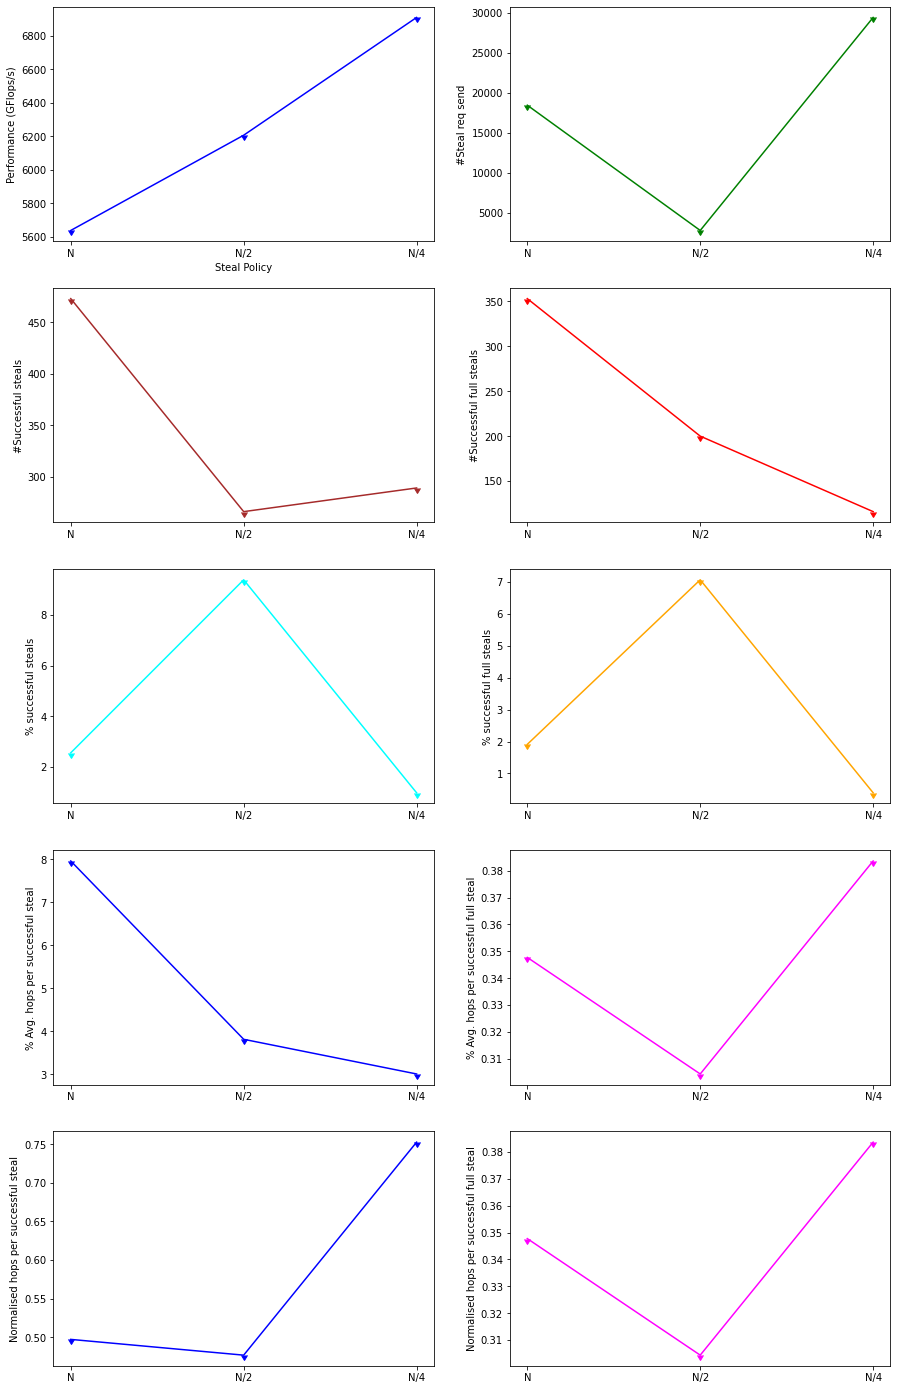

In [8]:

fig = plt.figure(figsize=(15, 25))
gs = GridSpec(nrows=5, ncols=2)



ax0 = fig.add_subplot(gs[0, 0])

plt.plot(ring_hops, gflops_ringhops, color="blue", marker=11)

ax0.set_xlabel('Steal Policy')
ax0.set_ylabel('Performance (GFlops/s)')
#plt.legend()

ax1 = fig.add_subplot(gs[0,1])

plt.plot(ring_hops, steal_req_send_ringhops, color="green", marker=11)


ax1.set_ylabel('#Steal req send')
#ax1.set_xlabel('Steal Policy')
#plt.legend()

ax2 = fig.add_subplot(gs[1,0])

plt.plot(ring_hops, successful_steals_ringhops, color="brown", marker=11)


ax2.set_ylabel('#Successful steals')
#ax2.set_xlabel('Steal Policy')
#plt.legend()

ax3 = fig.add_subplot(gs[1,1])

plt.plot(ring_hops, successful_full_steals_ringhops, color="red", marker=11)


ax3.set_ylabel('#Successful full steals')
#ax3.set_xlabel('Steal Policy')
#plt.legend()


ax4 = fig.add_subplot(gs[2,0])

plt.plot(ring_hops, perc_succesfull_steals_ringhops, color="cyan", marker=11)


ax4.set_ylabel('% successful steals')
#ax4.set_xlabel('Steal Policy')
#plt.legend()

ax5 = fig.add_subplot(gs[2,1])

plt.plot(ring_hops, perc_succesfull_full_steals_ringhops, color="orange", marker=11)


ax5.set_ylabel('% successful full steals')
#ax5.set_xlabel('Steal Policy')
#plt.legend()


ax6 = fig.add_subplot(gs[3,0])

plt.plot(ring_hops, avg_ringhops_succ, color="blue", marker=11)


ax6.set_ylabel('% Avg. hops per successful steal')
#ax6.set_xlabel('Steal Policy')
#plt.legend()

ax6 = fig.add_subplot(gs[3,1])

plt.plot(ring_hops, rate_ringhops_full_succ, color="magenta", marker=11)


ax6.set_ylabel('% Avg. hops per successful full steal')
#ax6.set_xlabel('Steal Policy')
#plt.legend()

ax7 = fig.add_subplot(gs[4,0])

plt.plot(ring_hops, rate_ringhops_succ, color="blue", marker=11)


ax7.set_ylabel('Normalised hops per successful steal')
#ax7.set_xlabel('Steal Policy')
#plt.legend()


ax8 = fig.add_subplot(gs[4,1])

plt.plot(ring_hops, rate_ringhops_full_succ, color="magenta", marker=11)


ax8.set_ylabel('Normalised hops per successful full steal')
#ax8.set_xlabel('Steal Policy')
#plt.legend()

#plt.legend([],[], frameon=False)

Text(0, 0.5, 'Normalised hops per successful full steal')

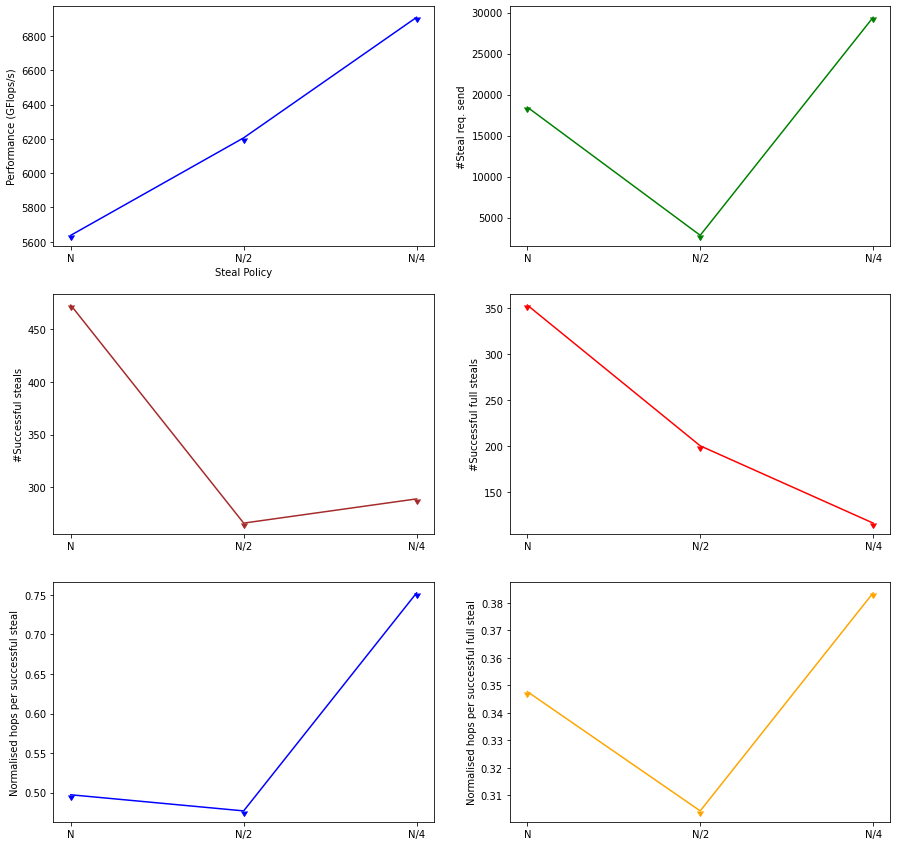

In [9]:

fig = plt.figure(figsize=(15, 15))
gs = GridSpec(nrows=3, ncols=2)


ax0 = fig.add_subplot(gs[0, 0])

plt.plot(ring_hops, gflops_ringhops, color="blue", marker=11)

ax0.set_xlabel('Steal Policy')
ax0.set_ylabel('Performance (GFlops/s)')
#plt.legend()



ax1 = fig.add_subplot(gs[0,1])

plt.plot(ring_hops, steal_req_send_ringhops, color="green", marker=11)


ax1.set_ylabel('#Steal req. send')
#ax1.set_xlabel('Steal Policy')
#plt.legend()

ax2 = fig.add_subplot(gs[1,0])

plt.plot(ring_hops, successful_steals_ringhops, color="brown", marker=11)


ax2.set_ylabel('#Successful steals')
#ax2.set_xlabel('Steal Policy')
#plt.legend()

ax3 = fig.add_subplot(gs[1,1])

plt.plot(ring_hops, successful_full_steals_ringhops, color="red", marker=11)


ax3.set_ylabel('#Successful full steals')
#ax3.set_xlabel('Steal Policy')
#plt.legend()






ax7 = fig.add_subplot(gs[2,0])

plt.plot(ring_hops, rate_ringhops_succ, color="blue", marker=11)


ax7.set_ylabel('Normalised hops per successful steal')
#ax7.set_xlabel('Steal Policy')
#plt.legend()


ax8 = fig.add_subplot(gs[2,1])

plt.plot(ring_hops, rate_ringhops_full_succ, color="orange", marker=11)


ax8.set_ylabel('Normalised hops per successful full steal')
#ax8.set_xlabel('Steal Policy')
#plt.legend()

#plt.legend([],[], frameon=False)

# RandomHops (Based on one node)

In [10]:
gflops_randomhops = [9449.794718, 5859.791896, 7054.764581]
steal_req_send_randomhops  = [2544, 40373, 10791, ]
successful_steals_randomhops = [172, 290, 257]
successful_full_steals_randomhops = [126, 216, 165]
perc_succesfull_steals_randomhops = [6.761006, 0.718302, 2.381614]
perc_succesfull_full_steals_randomhops = [4.952830, 0.535011, 1.529052]
task_received_randomhops = [1397, 2383, 1893]
avg_randomhops_succ = [5.924419, 3.696552, 2.536965]
avg_randomhops_full_succ = [4.206349, 2.444444, 1.751515]

rate_randomhops_succ = [i/j for i, j in zip(avg_randomhops_succ, hops)]
rate_randomhops_full_succ =[i/j for i, j in zip(avg_randomhops_full_succ, hops)]

print(rate_randomhops_succ)
print(rate_randomhops_full_succ)


[0.3702761875, 0.462069, 0.63424125]
[0.2628968125, 0.3055555, 0.43787875]


Text(0, 0.5, 'Normalised hops per successful full steal')

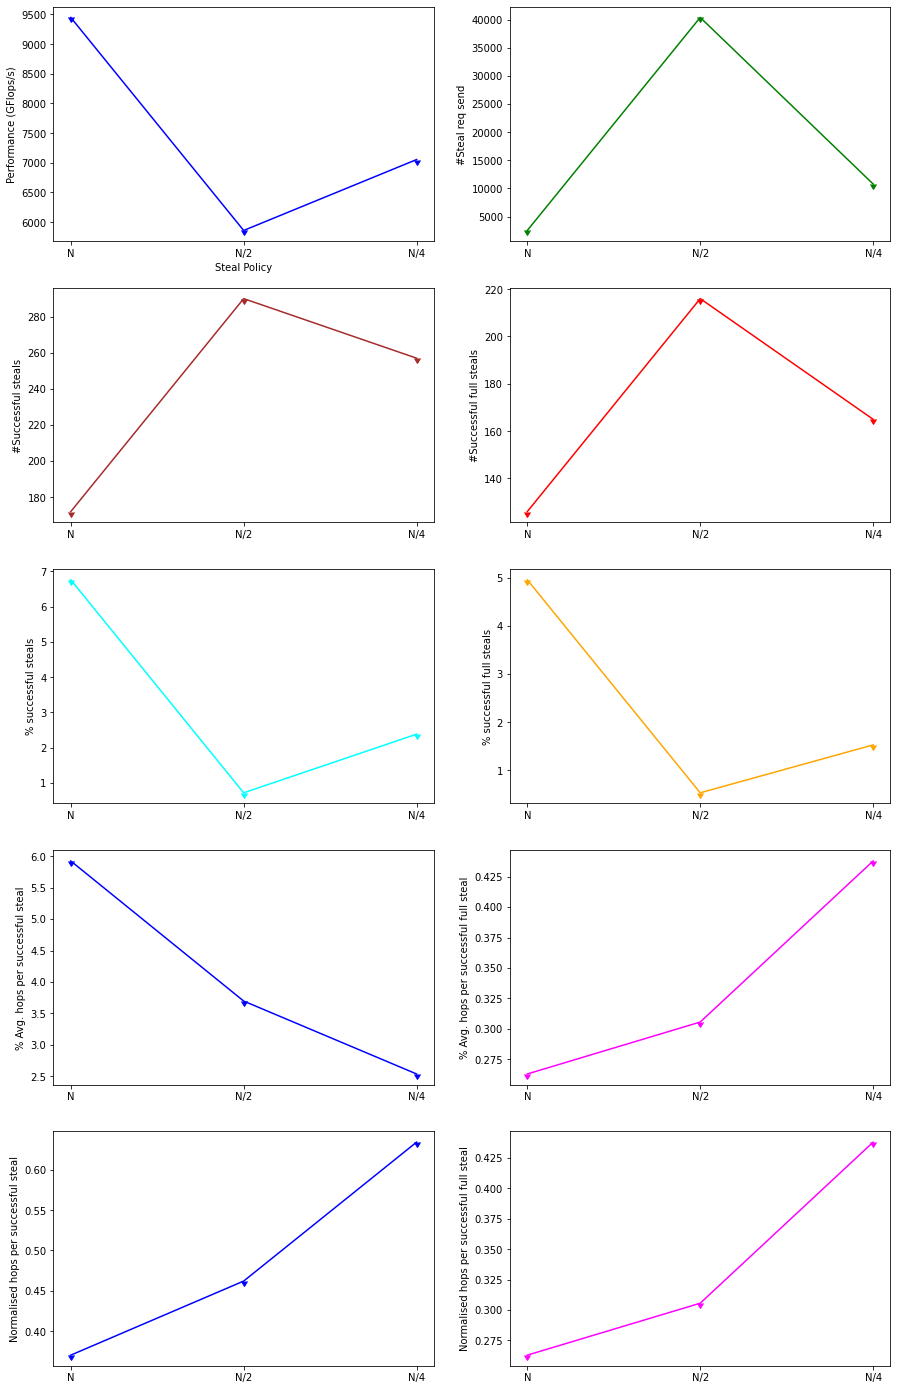

In [11]:

fig = plt.figure(figsize=(15, 25))
gs = GridSpec(nrows=5, ncols=2)



ax0 = fig.add_subplot(gs[0, 0])

plt.plot(ring_hops, gflops_randomhops, color="blue", marker=11)

ax0.set_xlabel('Steal Policy')
ax0.set_ylabel('Performance (GFlops/s)')
#plt.legend()

ax1 = fig.add_subplot(gs[0,1])

plt.plot(ring_hops, steal_req_send_randomhops, color="green", marker=11)


ax1.set_ylabel('#Steal req send')
#ax1.set_xlabel('Steal Policy')
#plt.legend()

ax2 = fig.add_subplot(gs[1,0])

plt.plot(ring_hops, successful_steals_randomhops, color="brown", marker=11)


ax2.set_ylabel('#Successful steals')
#ax2.set_xlabel('Steal Policy')
#plt.legend()

ax3 = fig.add_subplot(gs[1,1])

plt.plot(ring_hops, successful_full_steals_randomhops, color="red", marker=11)


ax3.set_ylabel('#Successful full steals')
#ax3.set_xlabel('Steal Policy')
#plt.legend()


ax4 = fig.add_subplot(gs[2,0])

plt.plot(ring_hops, perc_succesfull_steals_randomhops, color="cyan", marker=11)


ax4.set_ylabel('% successful steals')
#ax4.set_xlabel('Steal Policy')
#plt.legend()

ax5 = fig.add_subplot(gs[2,1])

plt.plot(ring_hops, perc_succesfull_full_steals_randomhops, color="orange", marker=11)


ax5.set_ylabel('% successful full steals')
#ax5.set_xlabel('Steal Policy')
#plt.legend()


ax6 = fig.add_subplot(gs[3,0])

plt.plot(ring_hops, avg_randomhops_succ, color="blue", marker=11)


ax6.set_ylabel('% Avg. hops per successful steal')
#ax6.set_xlabel('Steal Policy')
#plt.legend()

ax6 = fig.add_subplot(gs[3,1])

plt.plot(ring_hops, rate_randomhops_full_succ, color="magenta", marker=11)


ax6.set_ylabel('% Avg. hops per successful full steal')
#ax6.set_xlabel('Steal Policy')
#plt.legend()

ax7 = fig.add_subplot(gs[4,0])

plt.plot(ring_hops, rate_randomhops_succ, color="blue", marker=11)


ax7.set_ylabel('Normalised hops per successful steal')
#ax7.set_xlabel('Steal Policy')
#plt.legend()


ax8 = fig.add_subplot(gs[4,1])

plt.plot(ring_hops, rate_randomhops_full_succ, color="magenta", marker=11)


ax8.set_ylabel('Normalised hops per successful full steal')
#ax8.set_xlabel('Steal Policy')
#plt.legend()

#plt.legend([],[], frameon=False)

Text(0, 0.5, 'Normalised hops per successful full steal')

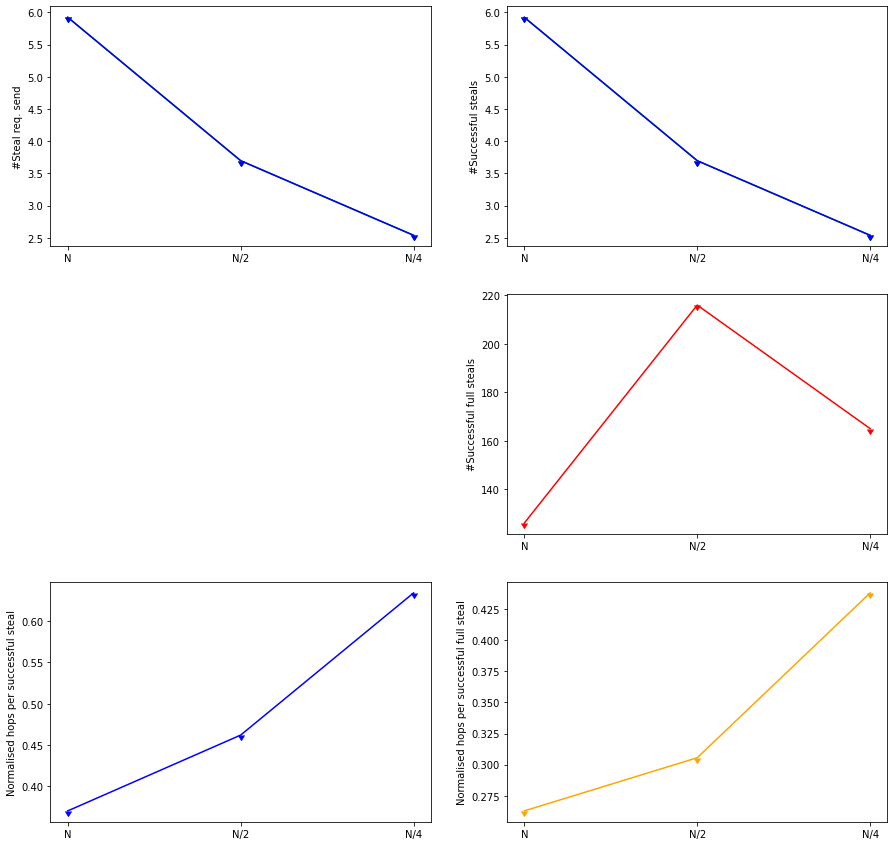

In [12]:

fig = plt.figure(figsize=(15, 15))
gs = GridSpec(nrows=3, ncols=2)





ax1 = fig.add_subplot(gs[0,0])

plt.plot(ring_hops, avg_randomhops_succ, color="green", marker=11)
plt.plot(ring_hops, avg_randomhops_succ, color="blue", marker=11)


ax1.set_ylabel('#Steal req. send')
#ax1.set_xlabel('Steal Policy')
#plt.legend()

ax2 = fig.add_subplot(gs[0,1])

plt.plot(ring_hops, avg_randomhops_succ, color="green", marker=11)
plt.plot(ring_hops, avg_randomhops_succ, color="blue", marker=11)




ax2.set_ylabel('#Successful steals')
#ax2.set_xlabel('Steal Policy')
#plt.legend()

ax3 = fig.add_subplot(gs[1,1])

plt.plot(ring_hops, successful_full_steals_randomhops, color="red", marker=11)


ax3.set_ylabel('#Successful full steals')
#ax3.set_xlabel('Steal Policy')
#plt.legend()






ax7 = fig.add_subplot(gs[2,0])

plt.plot(ring_hops, rate_randomhops_succ, color="blue", marker=11)


ax7.set_ylabel('Normalised hops per successful steal')
#ax7.set_xlabel('Steal Policy')
#plt.legend()


ax8 = fig.add_subplot(gs[2,1])

plt.plot(ring_hops, rate_randomhops_full_succ, color="orange", marker=11)


ax8.set_ylabel('Normalised hops per successful full steal')
#ax8.set_xlabel('Steal Policy')
#plt.legend()

#plt.legend([],[], frameon=False)

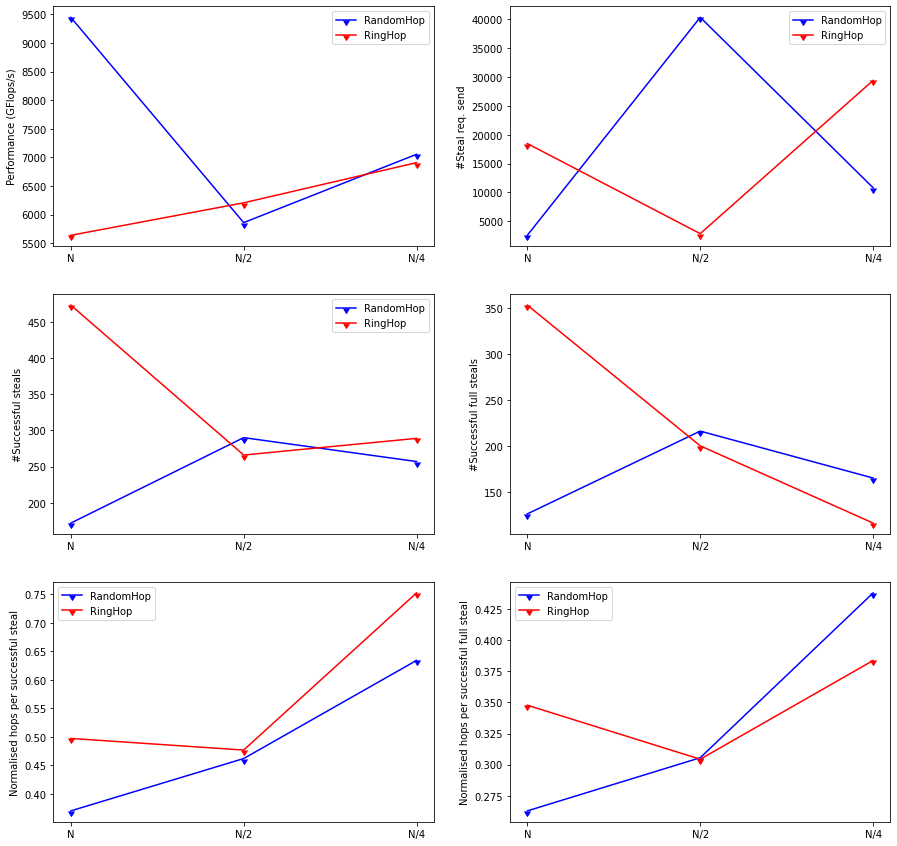

In [13]:


fig = plt.figure(figsize=(15, 15))
gs = GridSpec(nrows=3, ncols=2)


ax0 = fig.add_subplot(gs[0, 0])

plt.plot(ring_hops, gflops_randomhops, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, gflops_ringhops, color="red", marker=11, label='RingHop')

#ax0.set_xlabel('Steal Policy')
ax0.set_ylabel('Performance (GFlops/s)')
plt.legend()



ax1 = fig.add_subplot(gs[0,1])

plt.plot(ring_hops, steal_req_send_randomhops, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, steal_req_send_ringhops, color="red", marker=11, label='RingHop')


ax1.set_ylabel('#Steal req. send')
#ax1.set_xlabel('Steal Policy')
plt.legend()

ax2 = fig.add_subplot(gs[1,0])

plt.plot(ring_hops, successful_steals_randomhops, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, successful_steals_ringhops, color="red", marker=11, label='RingHop')


ax2.set_ylabel('#Successful steals')
#ax2.set_xlabel('Steal Policy')
plt.legend()

ax3 = fig.add_subplot(gs[1,1])

plt.plot(ring_hops, successful_full_steals_randomhops, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, successful_full_steals_ringhops, color="red", marker=11, label='RingHop')

ax3.set_ylabel('#Successful full steals')
#ax3.set_xlabel('Steal Policy')
#lt.legend()



ax7 = fig.add_subplot(gs[2,0])

plt.plot(ring_hops, rate_randomhops_succ, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, rate_ringhops_succ, color="red", marker=11, label='RingHop')


ax7.set_ylabel('Normalised hops per successful steal')
#ax7.set_xlabel('Steal Policy')
plt.legend()


ax8 = fig.add_subplot(gs[2,1])

plt.plot(ring_hops, rate_randomhops_full_succ, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, rate_ringhops_full_succ, color="red", marker=11, label='RingHop')


ax8.set_ylabel('Normalised hops per successful full steal')
#ax8.set_xlabel('Steal Policy')
plt.legend()

#plt.legend([],[], frameon=False)

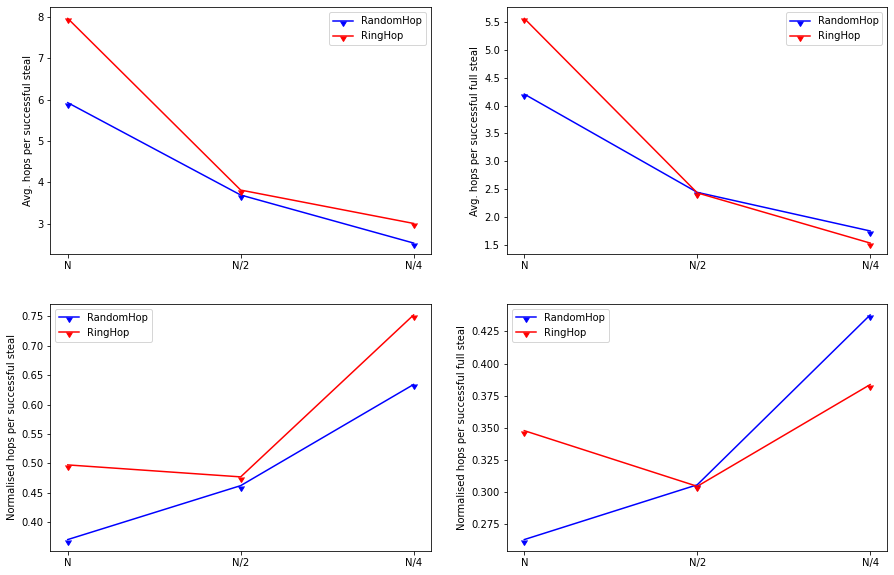

In [14]:


fig = plt.figure(figsize=(15, 10))
gs = GridSpec(nrows=2, ncols=2)



ax7 = fig.add_subplot(gs[0,0])

plt.plot(ring_hops, avg_randomhops_succ, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, avg_ringhops_succ, color="red", marker=11, label='RingHop')


ax7.set_ylabel('Avg. hops per successful steal')
#ax7.set_xlabel('Steal Policy')
plt.legend()


ax8 = fig.add_subplot(gs[0,1])

plt.plot(ring_hops, avg_randomhops_full_succ, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, avg_ringhops_full_succ, color="red", marker=11, label='RingHop')


ax8.set_ylabel('Avg. hops per successful full steal')
#ax8.set_xlabel('Steal Policy')
plt.legend()




ax7 = fig.add_subplot(gs[1,0])

plt.plot(ring_hops, rate_randomhops_succ, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, rate_ringhops_succ, color="red", marker=11, label='RingHop')


ax7.set_ylabel('Normalised hops per successful steal')
#ax7.set_xlabel('Steal Policy')
plt.legend()


ax8 = fig.add_subplot(gs[1,1])

plt.plot(ring_hops, rate_randomhops_full_succ, color="blue", marker=11, label='RandomHop')
plt.plot(ring_hops, rate_ringhops_full_succ, color="red", marker=11, label='RingHop')


ax8.set_ylabel('Normalised hops per successful full steal')
#ax8.set_xlabel('Steal Policy')
plt.legend()

#plt.legend([],[], frameon=False)

# RingHops (Based on node avg.)

In [15]:
gflops_ringhops = [5637.749904, 6206.124678, 6908.942390]
steal_req_send_ringhops  = [18473, 2832, 29430]
successful_steals_ringhops = [473,  266, 289]
successful_full_steals_ringhops = [353, 200, 116]
perc_succesfull_steals_ringhops = [2.560494, 9.392655, 0.981991]
perc_succesfull_full_steals_ringhops = [1.910897, 7.062147, 0.394156]
task_received_ringhops = [3834, 2242, 1731]
avg_ringhops_succ = [7.957717,  3.815789, 3.010381]
avg_ringhops_full_succ = [5.563739, 2.435000, 1.534483]

rate_ringhops_succ = [i/j for i, j in zip(avg_ringhops_succ, hops)]
rate_ringhops_full_succ =[i/j for i, j in zip(avg_ringhops_full_succ, hops)]

print(rate_ringhops_succ)
print(rate_ringhops_full_succ)


[0.4973573125, 0.476973625, 0.75259525]
[0.3477336875, 0.304375, 0.38362075]


In [16]:
gflops_ringhops_df = pd.DataFrame({
    
    'index' : ["N=16", "N/2", "N/4"], 

    'gflops_ringhops_Min' : [5637.749904, 6206.124678, 6908.94239],
    'gflops_ringhops_Max' : [5637.749904, 6206.124678, 6908.94239],
    'gflops_ringhops_Avg' : [5637.749904, 6206.124678, 6908.94239],
    
    'steal_req_send_ringhops_Min' : [1646.0, 2832.0,  14283.0 ],
    'steal_req_send_ringhops_Max' : [20908.0, 41694.0, 132869.0],
    'steal_req_send_ringhops_Avg' : [17341.25, 25174.0625, 55080.625],

    
    'perc_succesfull_steals_ringhops_Min' : [0.659388,   0.310014,  0.213471],
    'perc_succesfull_steals_ringhops_Max' : [17.314702, 9.392655, 2.377308],
    'perc_succesfull_steals_ringhops_Avg' : [2.444364625, 1.4764234375, 0.8601672499999999],
    
    'perc_succesfull_full_steals_ringhops_Min' : [ 0.45941,  0.189854, 0.074343 ],
    'perc_succesfull_full_steals_ringhops_Max' : [16.160389, 7.062147, 1.122334 ],
    'perc_succesfull_full_steals_ringhops_Avg' : [2.0910296875, 0.97404,  0.355479437],

    
    'avg_ringhops_succ_Min' : [4.204545, 3.807453, 2.865741],
    'avg_ringhops_succ_Max' : [9.131313, 6.307292, 3.53617],
    'avg_ringhops_succ_Avg' : [6.662471812500001,  5.125084125000001, 3.1919561874999998],
    
    'avg_ringhops_full_succ_Min' : [3.070776,  2.375, 1.5 ],
    'avg_ringhops_full_succ_Max' : [5.918033, 4.163399, 2.32967],
    'avg_ringhops_full_succ_Avg' : [4.4719655, 3.3030571249999996, 1.9496286875000002],
    
    'task_recvd_ringhops_Min' : [938.0,  962.0, 662.0],
    'task_recvd_ringhops_Max'  : [4507.0, 2242.0, 2836.0],
    'task_recvd_ringhops_Avg' : [2316.75, 1514.25, 1639.4375],
    

    
    'gflops_randomhops_Min' : [9449.794718, 5859.791896, 7054.764581],
    'gflops_randomhops_Max' : [9449.794718, 5859.791896, 7054.764581],
    'gflops_randomhops_Avg' : [9449.794718, 5859.791896, 7054.764581],
    
    'steal_req_send_randomhops_Min' : [836.0,  11802.0, 1422.0 ],
    'steal_req_send_randomhops_Max' : [2687.0, 40448.0, 11909.0],
    'steal_req_send_randomhops_Avg' : [2389.75, 36444.5625, 10284.5],

    
    'perc_succesfull_steals_randomhops_Min' : [3.672788, 0.229898, 0.980846 ],
    'perc_succesfull_steals_randomhops_Max' : [8.133971, 1.32181, 8.227848],
    'perc_succesfull_steals_randomhops_Avg' : [5.57101725, 0.5897484375, 2.1878918125],
    
    'perc_succesfull_full_steals_randomhops_Min' : [1.961603, 0.131771, 0.518183 ],
    'perc_succesfull_full_steals_randomhops_Max' : [6.339713, 0.965938, 5.414909],
    'perc_succesfull_full_steals_randomhops_Avg' : [3.6937075, 0.4178036875000001, 1.3475290000000002],

    
    'avg_randomhops_succ_Min' : [5.411765, 3.398374, 2.423529  ],
    'avg_randomhops_succ_Max' : [7.884892, 4.9, 2.80303],
    'avg_randomhops_succ_Avg' : [6.734176124999999, 4.094035874999999, 2.6448143125],
    
    'avg_randomhops_full_succ_Min' : [3.489362,  2.247619, 1.666667 ],
    'avg_randomhops_full_succ_Max' : [5.220779, 3.284211, 1.894737],
    'avg_randomhops_full_succ_Avg' : [4.2478153125, 2.6749226249999998, 1.807012625],
    
    'task_recvd_randomhops_Min' : [584.0, 554.0, 702.0 ],
    'task_recvd_randomhops_Max'  : [1397.0, 2383.0, 1893.0],
    'task_recvd_randomhops_Avg' : [990.5625, 1573.75, 1327.0625],
    
    
})

In [17]:
gflops_ringhops_df.head()

,index,gflops_ringhops_Min,gflops_ringhops_Max,gflops_ringhops_Avg,steal_req_send_ringhops_Min,steal_req_send_ringhops_Max,steal_req_send_ringhops_Avg,perc_succesfull_steals_ringhops_Min,perc_succesfull_steals_ringhops_Max,perc_succesfull_steals_ringhops_Avg,...,perc_succesfull_full_steals_randomhops_Avg,avg_randomhops_succ_Min,avg_randomhops_succ_Max,avg_randomhops_succ_Avg,avg_randomhops_full_succ_Min,avg_randomhops_full_succ_Max,avg_randomhops_full_succ_Avg,task_recvd_randomhops_Min,task_recvd_randomhops_Max,task_recvd_randomhops_Avg
0,N=16,5637.749904,5637.749904,5637.749904,1646.0,20908.0,17341.2500,0.659388,17.314702,2.444365,...,3.693707,5.411765,7.884892,6.734176,3.489362,5.220779,4.247815,584.0,1397.0,990.5625
1,N/2,6206.124678,6206.124678,6206.124678,2832.0,41694.0,25174.0625,0.310014,9.392655,1.476423,...,0.417804,3.398374,4.900000,4.094036,2.247619,3.284211,2.674923,554.0,2383.0,1573.7500
2,N/4,6908.942390,6908.942390,6908.942390,14283.0,132869.0,55080.6250,0.213471,2.377308,0.860167,...,1.347529,2.423529,2.803030,2.644814,1.666667,1.894737,1.807013,702.0,1893.0,1327.0625


<AxesSubplot:xlabel='index', ylabel='avg_ringhops_succ_Max'>

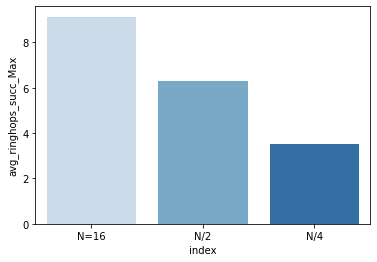

In [18]:
sns.barplot(y = 'avg_ringhops_succ_Min',
            x = 'index',
            #hue = 'index',
            data = gflops_ringhops_df,
            palette = "Blues")

sns.barplot(y = 'avg_ringhops_succ_Max',
            x = 'index',
            #hue = 'index',
            data = gflops_ringhops_df,
            palette = "Blues")

Text(0, 0.5, '% successful full steal req.')

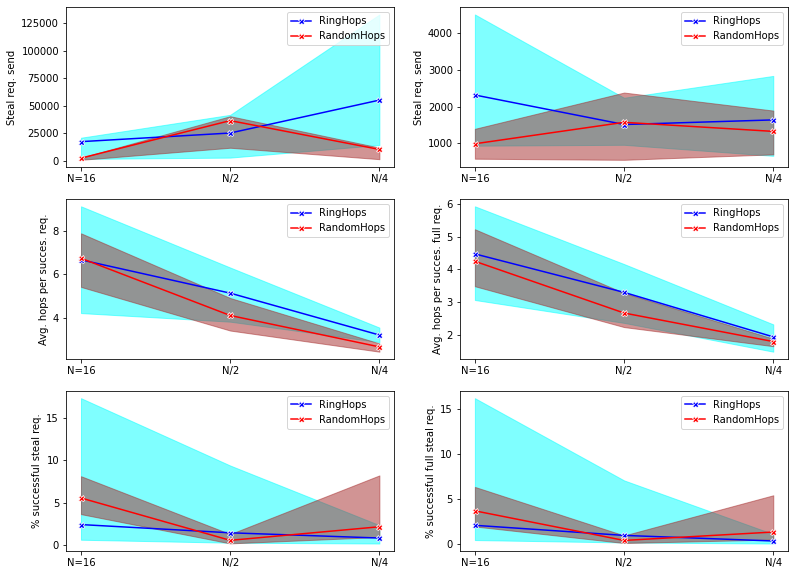

In [19]:


fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=3, ncols=3)



ax0 = fig.add_subplot(gs[0,0])

sns.lineplot( x = 'index', y = 'steal_req_send_ringhops_Avg', data = gflops_ringhops_df, ax=ax0, marker="X", linestyle='-', color = 'blue', label='RingHops')
ax0.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['steal_req_send_ringhops_Min'], gflops_ringhops_df['steal_req_send_ringhops_Max'], color = 'cyan', alpha = 0.5)

sns.lineplot( x = 'index', y = 'steal_req_send_randomhops_Avg', data = gflops_ringhops_df, ax=ax0, marker="X", linestyle='-', color = 'red', label='RandomHops')
ax0.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['steal_req_send_randomhops_Min'], gflops_ringhops_df['steal_req_send_randomhops_Max'], color = 'brown', alpha = 0.5)


ax0.set_xlabel('')
ax0.set_ylabel('Steal req. send')


ax1 = fig.add_subplot(gs[0,1])

sns.lineplot( x = 'index', y = 'task_recvd_ringhops_Avg', data = gflops_ringhops_df, ax=ax1, marker="X", linestyle='-', color = 'blue', label='RingHops')
ax1.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['task_recvd_ringhops_Min'], gflops_ringhops_df['task_recvd_ringhops_Max'], color = 'cyan', alpha = 0.5)

sns.lineplot( x = 'index', y = 'task_recvd_randomhops_Avg', data = gflops_ringhops_df, ax=ax1, marker="X", linestyle='-', color = 'red', label='RandomHops')
ax1.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['task_recvd_randomhops_Min'], gflops_ringhops_df['task_recvd_randomhops_Max'], color = 'brown', alpha = 0.5)

ax1.set_xlabel('')
ax1.set_ylabel('Steal req. send')



ax2 = fig.add_subplot(gs[1,0])

sns.lineplot( x = 'index', y = 'avg_ringhops_succ_Avg', data = gflops_ringhops_df, ax=ax2, marker="X", linestyle='-', color = 'blue', label='RingHops')
ax2.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['avg_ringhops_succ_Min'], gflops_ringhops_df['avg_ringhops_succ_Max'], color = 'cyan', alpha = 0.5)

sns.lineplot( x = 'index', y = 'avg_randomhops_succ_Avg', data = gflops_ringhops_df, ax=ax2, marker="X", linestyle='-', color = 'red', label='RandomHops')
ax2.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['avg_randomhops_succ_Min'], gflops_ringhops_df['avg_randomhops_succ_Max'], color = 'brown', alpha = 0.5)

ax2.set_xlabel('')
ax2.set_ylabel('Avg. hops per succes. req.')

ax3 = fig.add_subplot(gs[1,1])

sns.lineplot( x = 'index', y = 'avg_ringhops_full_succ_Avg', data = gflops_ringhops_df, ax=ax3, marker="X", linestyle='-', color = 'blue', label='RingHops')
ax3.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['avg_ringhops_full_succ_Min'], gflops_ringhops_df['avg_ringhops_full_succ_Max'], color = 'cyan', alpha = 0.5)

sns.lineplot( x = 'index', y = 'avg_randomhops_full_succ_Avg', data = gflops_ringhops_df, ax=ax3, marker="X", linestyle='-', color = 'red', label='RandomHops')
ax3.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['avg_randomhops_full_succ_Min'], gflops_ringhops_df['avg_randomhops_full_succ_Max'], color = 'brown', alpha = 0.5)

ax3.set_xlabel('')
ax3.set_ylabel('Avg. hops per succes. full req.')


ax4 = fig.add_subplot(gs[2,0])

sns.lineplot( x = 'index', y = 'perc_succesfull_steals_ringhops_Avg', data = gflops_ringhops_df, ax=ax4, marker="X", linestyle='-', color = 'blue', label='RingHops')
ax4.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['perc_succesfull_steals_ringhops_Min'], gflops_ringhops_df['perc_succesfull_steals_ringhops_Max'], color = 'cyan', alpha = 0.5)

sns.lineplot( x = 'index', y = 'perc_succesfull_steals_randomhops_Avg', data = gflops_ringhops_df, ax=ax4, marker="X", linestyle='-', color = 'red', label='RandomHops')
ax4.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['perc_succesfull_steals_randomhops_Min'], gflops_ringhops_df['perc_succesfull_steals_randomhops_Max'], color = 'brown', alpha = 0.5)

ax4.set_xlabel('')
ax4.set_ylabel('% successful steal req.')


ax5 = fig.add_subplot(gs[2,1])
sns.lineplot( x = 'index', y = 'perc_succesfull_full_steals_ringhops_Avg', data = gflops_ringhops_df, ax=ax5, marker="X", linestyle='-', color = 'blue', label='RingHops')
ax5.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['perc_succesfull_full_steals_ringhops_Min'], gflops_ringhops_df['perc_succesfull_full_steals_ringhops_Max'], color = 'cyan', alpha = 0.5)

sns.lineplot( x = 'index', y = 'perc_succesfull_full_steals_randomhops_Avg', data = gflops_ringhops_df, ax=ax5, marker="X", linestyle='-', color = 'red', label='RandomHops')
ax5.fill_between(gflops_ringhops_df['index'], gflops_ringhops_df['perc_succesfull_full_steals_randomhops_Min'], gflops_ringhops_df['perc_succesfull_full_steals_randomhops_Max'], color = 'brown', alpha = 0.5)

ax5.set_xlabel('')
ax5.set_ylabel('% successful full steal req.')


#plt.legend([],[], frameon=False)

======================
* The steal request send is a lot for N/4, but for N/2 it is close enogh to N
* The maximum hops comes close to maximum possible hops in N/2 and N/4, but for N it is way off